# imports

In [1]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt; plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns; sns.set(font='Malgun Gothic')

from scipy.stats import skew, kurtosis

import warnings; warnings.filterwarnings(action='ignore')
from IPython.core.display import display, HTML
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [2]:
from sklearn import datasets

# sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# preprocessing
from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA

# estimators
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

# neural
import tensorflow as tf; tf.random.set_seed(0)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ensemble
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

# curves
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, TimeSeriesSplit, KFold, StratifiedKFold, GridSearchCV

# tools
import pycaret as pyc
import optuna

# read

In [3]:
iris = datasets.load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# before scale

In [5]:
from sklearn.cluster import KMeans, DBSCAN

In [6]:
df_km = df[['sepal length (cm)', 'sepal width (cm)']].copy()

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

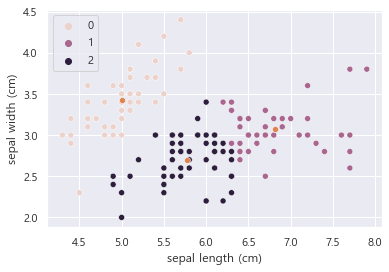

In [7]:
model = KMeans(n_clusters=3)
model.fit(df_km)
df_km['cluster_label'] = model.predict(df_km)

sns.scatterplot(data=df_km, x='sepal length (cm)', y='sepal width (cm)', hue='cluster_label')
cc = pd.DataFrame(model.cluster_centers_)
sns.scatterplot(data=cc, x=0, y=1, )

In [8]:
pd.crosstab(df['target'], df_km['cluster_label'])

cluster_label,0,1,2
target,,,
0,50,0,0
1,0,12,38
2,0,35,15


# after scale

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

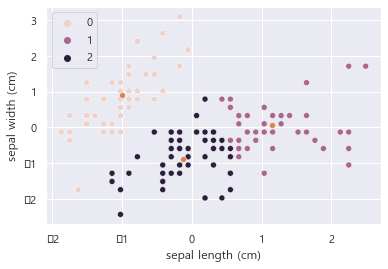

In [9]:
ss = StandardScaler()
df_km[['sepal length (cm)', 'sepal width (cm)']] = ss.fit_transform(df_km[['sepal length (cm)', 'sepal width (cm)']])

model_scaled = KMeans(n_clusters=3)
model_scaled.fit(df_km)
df_km['cluster_label_scaled'] = model_scaled.predict(df_km)

sns.scatterplot(data=df_km, x='sepal length (cm)', y='sepal width (cm)', hue='cluster_label')
cc_scaled = pd.DataFrame(model_scaled.cluster_centers_)
sns.scatterplot(data=cc_scaled, x=0, y=1)

In [10]:
pd.crosstab(df['target'], df_km['cluster_label_scaled'])

cluster_label_scaled,0,1,2
target,,,
0,1,49,0
1,37,0,13
2,15,0,35


# n_clusters change

In [11]:
inertia_list = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df[['sepal length (cm)', 'sepal width (cm)']])
    inertia_list.append(model.inertia_)

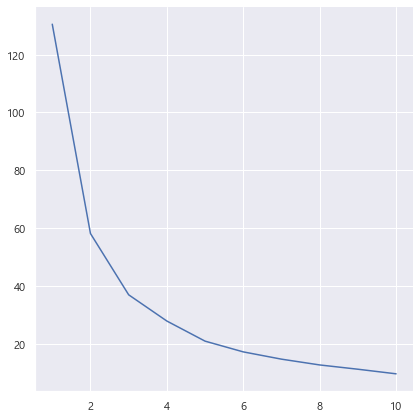

In [12]:
sns.relplot(range(1, 11), inertia_list, kind='line', height=6)

In [13]:
inertia_list = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df[['petal length (cm)', 'petal width (cm)']])
    inertia_list.append(model.inertia_)

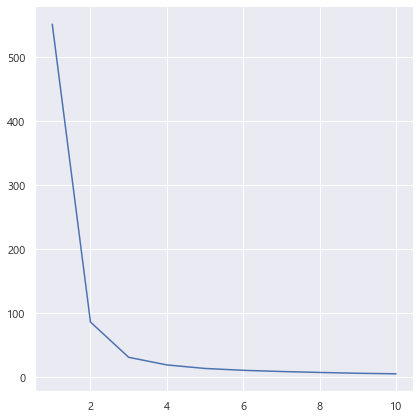

In [14]:
sns.relplot(range(1, 11), inertia_list, kind='line', height=6)

In [15]:
from sklearn.metrics import silhouette_samples

silhouette_coef = silhouette_samples(
    df_km[['sepal length (cm)', 'sepal width (cm)']], 
    df_km['cluster_label'], 
)

In [16]:
silhouette_coef

array([ 0.60895316,  0.17480151,  0.48271612,  0.39020636,  0.62100805,
        0.48305035,  0.57574535,  0.59284531,  0.17496985,  0.33834169,
        0.52874302,  0.59813473,  0.22123061,  0.29066531,  0.30894411,
        0.27548228,  0.48305035,  0.60895316,  0.37192816,  0.58494424,
        0.45969687,  0.6026837 ,  0.59235422,  0.50150757,  0.59813473,
        0.11113005,  0.59284531,  0.58537419,  0.5446588 ,  0.48271612,
        0.36699774,  0.45969687,  0.45841093,  0.36755164,  0.33834169,
        0.42956827,  0.47128881,  0.62158795,  0.28991135,  0.57427037,
        0.62082922, -0.31640975,  0.4578362 ,  0.62082922,  0.58494424,
        0.22123061,  0.58494424,  0.47974318,  0.56606144,  0.52874482,
        0.58994003,  0.4244064 ,  0.59718502,  0.52655153,  0.1386444 ,
        0.54900954,  0.36605076,  0.4182139 ,  0.3709263 ,  0.44962961,
        0.41379963,  0.2734399 ,  0.42394516,  0.22470783,  0.4892434 ,
        0.56521658,  0.35172333,  0.57023521,  0.36608458,  0.58

In [17]:
df_km['silhouette_coef'] = silhouette_coef

In [18]:
df_km

,sepal length (cm),sepal width (cm),cluster_label,cluster_label_scaled,silhouette_coef
0,-0.900681,1.019004,0,1,0.608953
1,-1.143017,-0.131979,0,1,0.174802
2,-1.385353,0.328414,0,1,0.482716
3,-1.506521,0.098217,0,1,0.390206
4,-1.021849,1.249201,0,1,0.621008
...,...,...,...,...,...
145,1.038005,-0.131979,1,2,0.521614
146,0.553333,-1.282963,2,0,0.333934
147,0.795669,-0.131979,1,2,0.408047
148,0.432165,0.788808,1,2,0.273485


In [19]:
from sklearn.metrics import silhouette_score

silhouette_sc = silhouette_score(
    df_km[['sepal length (cm)', 'sepal width (cm)']], 
    df_km['cluster_label'], 
)

silhouette_sc

0.41614521413153727

In [20]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

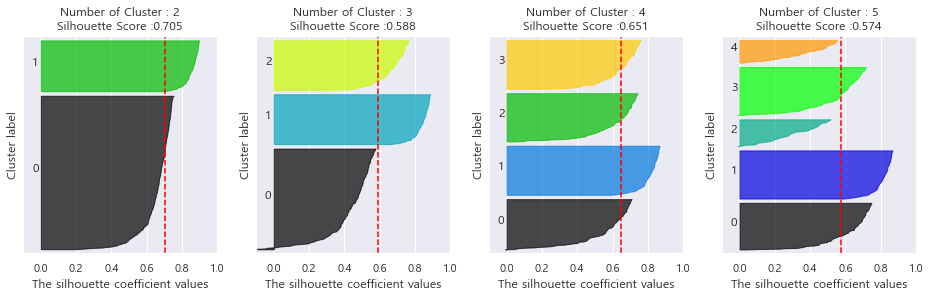

In [21]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

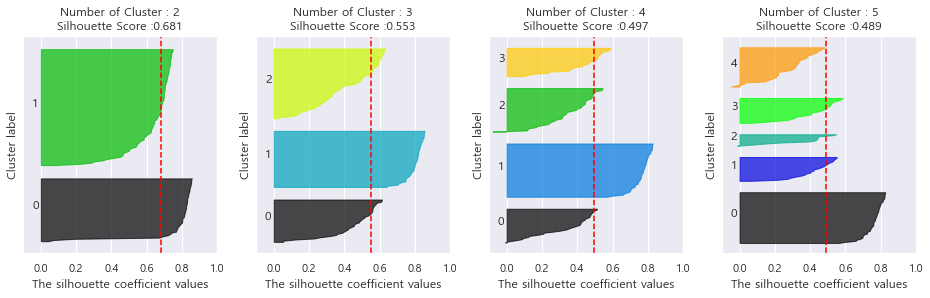

In [22]:
visualize_silhouette([2, 3, 4, 5], iris.data)

In [23]:
df_km.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'cluster_label',
       'cluster_label_scaled', 'silhouette_coef'],
      dtype='object')

In [24]:
# from mpl_toolkits.mplot3d import Axes3D
# # scatter plot
# fig = plt.figure( figsize=(6,6))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# ax.scatter(df_km['sepal length (cm)'],df_km['sepal width (cm)'],df_km['petal length (cm)'],c=df_km['cluster_label'],alpha=0.5)
# ax.set_xlabel('sepal length (cm)')
# ax.set_ylabel('sepal width (cm)')
# ax.set_zlabel('petal length (cm)')
# plt.show()

# pca

In [25]:
df_pca = df.copy()

In [26]:
df_pca.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [27]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for i in range(1, 5):
    pca = PCA(n_components=i)
    pca.fit_transform(df_pca[cols])
    print(i, pca.explained_variance_ratio_)

1 [0.92461872]
2 [0.92461872 0.05306648]
3 [0.92461872 0.05306648 0.01710261]
4 [0.92461872 0.05306648 0.01710261 0.00521218]


In [28]:
pca = PCA(n_components=2)
df_pca[['pca1', 'pca2']] = pca.fit_transform(df_pca[cols])

In [29]:
df_pca

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pca1,pca2
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,1.900942,0.116628


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

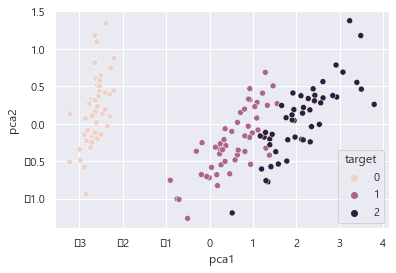

In [30]:
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue='target')

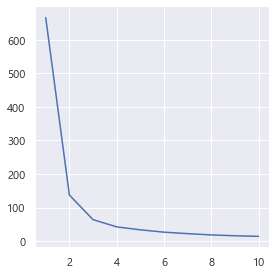

In [31]:
inertia_list = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_pca[['pca1', 'pca2']])
    inertia_list.append(model.inertia_)

sns.relplot(range(1, 11), inertia_list, kind='line', height=4)

In [32]:
model = KMeans(n_clusters=3)
model.fit(df_pca[['pca1', 'pca2']])

pd.crosstab(df_pca['target'], model.predict(df_pca[['pca1', 'pca2']]))

col_0,0,1,2
target,,,
0,50,0,0
1,0,3,47
2,0,36,14


In [33]:
silhouette_score(df_pca[['pca1', 'pca2']], df_pca['target'])

0.5343927878510991

In [34]:
# my_cluster
inertia_list = []
for k in np.arange(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    pred = model.predict(df_pca)
    df_pca["cluster_label"] = pred.reshape(-1, 1)
    print(df_pca.head())
    score = silhouette_score(df_pca[['pca1','pca2']] , df_pca['cluster_label'])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target      pca1      pca2  cluster_label  
0       0 -2.684126  0.319397              1  
1       0 -2.714142 -0.177001              1  
2       0 -2.888991 -0.144949              1  
3       0 -2.745343 -0.318299              1  
4       0 -2.728717  0.326755              1  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2     

# nh

In [35]:
cus = pd.read_csv('./cus_info.csv')

In [36]:
cus

,고객번호,성별,연령대,투자성향,자산구간,주거래상품군,라이프스타일,서비스등급,총투자기간,주거래업종구분
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097067e5b41a971afa1da,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f804d2aae1393f76fa2,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c226bfff4211d8a7bde6,2,7,4,3,2,5,5,6,9
3,6d497facfa1ea5901b827335553331f8555fec02a8184f6e839bd1c2a9f05076,2,6,4,4,8,5,3,6,16
4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff4451fa3eada62295c420,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...
9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702ef1643ea9028aa403dd,1,9,4,2,2,9,5,2,16
9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526dee26a068e1f63395f91,2,2,3,1,2,2,9,1,16
9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1f606f6b85171a626b8,2,7,4,2,2,5,5,2,16
9998,4006ddaa5673365096b9dd5965e20db866f6523c162f791f31a400644923db9e,1,5,99,5,2,5,3,2,5


In [37]:
cus_temp = cus.drop('고객번호', axis=1)
cus_temp.shape

(10000, 9)

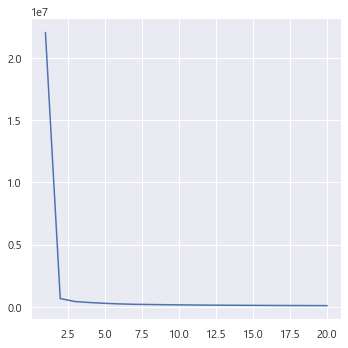

In [38]:
clusters = range(1, 21)
inertia_list = []
ss_list = []
for k in clusters:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(cus_temp)
    inertia_list.append(model.inertia_)
    
    # ss = silhouette_score(
    #     cus_temp, 
    #     model.fit(cus_temp)
    # )
    
    # print(i, ss)
sns.relplot(clusters, inertia_list, kind='line'); plt.show()

In [39]:
import pandas_datareader as pdr

In [40]:
pdr.naver.NaverDailyReader(
    symbols='005930', 
    start='2016-09-21', 
    end='2021-10-21'
).read()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-21,31900,32019,31520,31840,210181
2016-09-22,32000,32820,31980,32360,228599
2016-09-23,31640,31960,31320,31420,365993
2016-09-26,31420,31920,31280,31360,290496
2016-09-27,31000,31500,30660,31380,196688
...,...,...,...,...,...
2021-10-15,70200,71000,70000,70100,18051612
2021-10-18,70200,70300,69200,70200,13486391
2021-10-19,70800,71000,70400,70600,9507991


In [43]:
retail = pd.read_excel('./Online Retail.xlsx')

In [45]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
